In [1]:
# Imports modules
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# Import data
df = pd.read_csv('cleaned_data.csv')

# Split the data frame into input and target data frames
X = df.ix[:, df.columns != 'fraud']
y = df.ix[:, df.columns == 'fraud']

# Shuffle and partition our data into 80% train data and 20% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Use undersampling to create a balanced set
# Number of data points in the minority class
number_records_fraud = len(y_train[y_train['fraud'] == 1])
fraud_indices = np.array(y_train[y_train['fraud'] == 1].index)

# Picking the indices of the normal classes
normal_indices = y_train[y_train['fraud'] == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'fraud']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'fraud']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data['fraud'] == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data['fraud'] == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  4270


Chi-Squared:
hour1 109.744286768
field1 715.718919447
field2 10.7300365758
hour2 108.320281553
flag1 46.8443532503
field4 258.00059302
indicator1 7.52771088316
indicator2 22.8040279345
flag2 32.0984160411
flag3 54.7201928663
flag4 0.0169041963579
location_risk 744.884298687


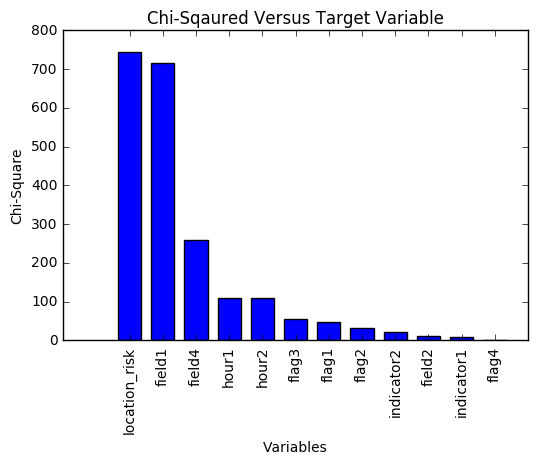

In [3]:
# Create a data frame of only categorical values for chi-squared test
categorical = X_undersample.drop(['amount', 'flag5', 'email_risk'], 1)

# Creating a chi-squared plot
chi = []
print('Chi-Squared:')
for column in categorical:
    try:
        # tab = pd.crosstab(index=numdf[target], columns=numdf[column])
        tab = pd.crosstab(y_undersample['fraud'], categorical[column])
    except KeyError:
        pass
    chi2 = chi2_contingency(tab)[0]
    chi.append(chi2)
    print(column, chi2)

indices = np.argsort(chi)[::-1]

columns= []
for i in indices:
        name = categorical.columns[i]
        if name != 'fraud':
            columns.append(name)
        else:
            columns.append(categorical.columns[i+1])
            # columns.append('status')

x = []
y = sorted(chi, reverse=True)
for i in range(len(y)):
    x.append(i)
plt.bar(x, y, width=0.7, align='center')
plt.xticks(x, columns, rotation=90)
plt.xlabel('Variables')
plt.ylabel('Chi-Square')
plt.title('Chi-Sqaured Versus Target Variable')
plt.show()

C:\Users\Jonathan\AppData\Local\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Feature ranking:
1. email_risk (0.133405)
2. field4 (0.132358)
3. amount (0.130430)
4. location_risk (0.099744)
5. field1 (0.093914)
6. hour1 (0.090763)
7. hour2 (0.089991)
8. flag5 (0.064673)
9. flag2 (0.045724)
10. flag1 (0.037954)
11. field2 (0.026693)
12. flag3 (0.023367)
13. indicator1 (0.019479)
14. indicator2 (0.007131)
15. flag4 (0.004376)


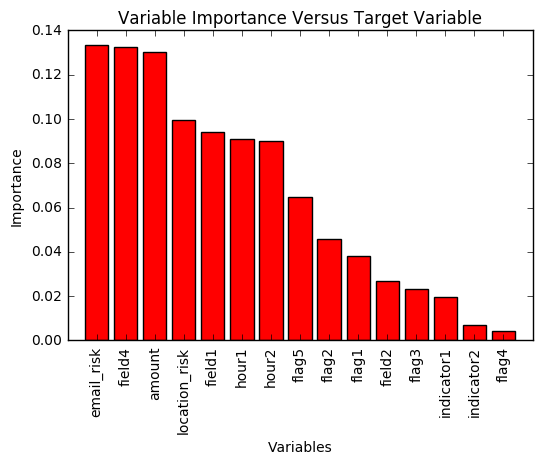

In [4]:
## Variable importance section
# Convert our data frame to multidimensional arrays
X = np.array(X_undersample)
# X = preprocessing.scale(X)
y = np.array(y_undersample)

# Build a decision tree and compute the variables importances
# clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# clf = DecisionTreeClassifier(random_state=0)
clf = RandomForestClassifier(n_estimators=50)

# Fitting the decision tree
clf.fit(X, y)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
columns = []
for i in indices:
    name = X_undersample.columns[i]
    columns.append(name)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, columns[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Variable Importance Versus Target Variable")
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.bar(range(X.shape[1]), importances[indices], color='r', align="center")
plt.xticks(range(X.shape[1]), columns, rotation='90')
plt.xlim([-1, X.shape[1]])
plt.show()